In [795]:
import pandas as pd
import numpy as np
import random
from scipy.optimize import *

In [796]:
data = pd.read_csv('digit-recognizer\\X.csv')

In [797]:
data

,label,0,1,2,3,4,5,6,7,8,...,390,391,392,393,394,395,396,397,398,399
0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4996,9,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4997,9,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4998,9,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [798]:
x = data.drop('label',1)
x

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4996,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4997,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4998,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [799]:
y = data['label']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    9
4996    9
4997    9
4998    9
4999    9
Name: label, Length: 5000, dtype: int64

In [922]:
def nn_param(low,high):
    epsilon = np.sqrt(6)/(np.sqrt(low)+np.sqrt(high))
    return np.random.uniform(low=-epsilon, high=epsilon, size=(high,low+1))

print(nn_param(5,5))

[[ 0.10644039 -0.33402732 -0.24415045 -0.06494941  0.12279568  0.46634265]
 [-0.52254806 -0.01005438 -0.29878452 -0.41170147  0.50488829  0.27804979]
 [ 0.33729808 -0.26827056  0.33520357  0.16087128 -0.26406202  0.08487155]
 [-0.52243207  0.3241176   0.32141291 -0.44932938 -0.30410315 -0.09657609]
 [-0.25973898  0.09005949  0.12017501 -0.02839473 -0.11774155  0.31893767]]


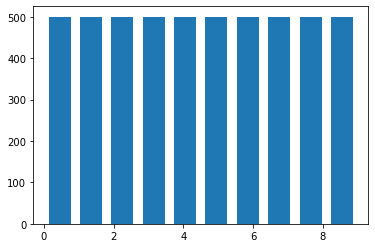

In [923]:
plt.hist(y,rwidth=0.7)
plt.show()

In [926]:
def nn_params(Theta1,Theta2):
    return np.array(np.concatenate((np.reshape(Theta1,-1,'F'),np.reshape(Theta2,-1,'F')),axis=0))

print(nn_params(np.array([1,2,3]),np.array([5,6,7])))

[1 2 3 5 6 7]


In [927]:
def sigmoid(z):
    return [[1/(1+np.exp(-i)) for i in z[j]] for j in range(0,len(z))]
sigmoid([[-1],[-0.5],[0.0],[0.5],[1.5]])

[[0.2689414213699951],
 [0.3775406687981454],
 [0.5],
 [0.6224593312018546],
 [0.8175744761936437]]

In [928]:
def sigmoid_predict(z):
    return [1/(1+np.exp(-i)) for i in z]

In [929]:
def sigmoidGradient(z):
    temp = np.array([1/(1+np.exp(-i)) for i in z])
    return temp*(1-temp)

sigmoidGradient([-1,-0.5,0.0,0.5,1.5])

array([0.19661193, 0.23500371, 0.25      , 0.23500371, 0.14914645])

In [930]:
def cost_funct(y_Vec,h_x,m):
    J = (np.sum(np.sum(-y_Vec*np.log(h_x)-(1-y_Vec)*np.log(1-h_x))))/m
    return J

In [958]:
def nnCostFunction(Theta, X, y,lamda):
    
    ##Prerequisite variables
    hidden_layer = 25
    label = 10
    input_layer = 400
    Theta1 = Theta[:(input_layer+1)*hidden_layer]
    Theta2 = Theta[(input_layer+1)*hidden_layer:]
    Theta1 = np.reshape(Theta1,(hidden_layer,(input_layer+1)),'F')
    Theta2 = np.reshape(Theta2,(label,(hidden_layer+1)),'F')
    y_Vec = np.zeros((len(X),label))
    y_vec = np.zeros((len(X),label))
    m = len(y)
    
    ##Forward Propagation
    X = np.insert(X,0,1,axis=1)
    a1 = X
    
    z2 = np.matmul(a1,Theta1.T)
    a2 = sigmoid(z2)
    
    a2 = np.insert(a2,0,1,axis = 1)
    z3 = np.matmul(a2,Theta2.T)
    a3 = sigmoid(z3)
    
    h_x = a3
    for i in range (0,len(y)):
        y_vec[i][y[i]-1] = 1
        
    J = cost_funct(y_vec,np.array(h_x),m)  ##Cost function without regularisation
    ##Backward Propagation
    
    A1 = X
    Z2 = np.matmul(A1,Theta1.T)
    A2 = sigmoid(Z2)
    
    A2 = np.insert(A2,0,1,axis = 1)
    Z3 = np.matmul(A2,Theta2.T)
    A3 = sigmoid(Z3)
    
    for i in range (0,len(y)):
        y_Vec[i][y[i]-1] = 1
    
    Del3 = np.subtract(A3,y_Vec)
    
    Del2 = np.array(Del3@Theta2)*np.array(np.insert(sigmoidGradient(z2),0,1,axis = 1))
    Del2 = Del2[:,1:]
    Theta1_grad = (Del2.T@A1)/m
    Theta2_grad = (Del3.T@A2)/m
    reg_term = (lamda/(2*m))*(np.sum(np.sum(np.square(Theta1[:,1:]))) 
                        + np.sum(np.sum(np.square(Theta2[:,1:]))))                    
                                ##Regularisation (Works when lambda>=1)
    
    J = J+reg_term  ##Cost Function using regularisation
    print(J)
    theta1 = lamda*(Theta1)/m
    theta2 = lamda*(Theta2)/m
    Theta1_grad += theta1
    Theta2_grad += theta2
#     print(pd.DataFrame(Theta1_grad))
    return J,nn_params(Theta1_grad,Theta2_grad)

In [1012]:
def run(X,y):
    hidden_layer = 25
    label = 10
    input_layer = 400
    lamda = 1
#     Theta1 = nn_param(len(X[0]),hidden_layer)
#     Theta2 = nn_param(hidden_layer,label)
    Theta1 = pd.read_csv('digit-recognizer\\Theta_1.csv').to_numpy()
    Theta2 = pd.read_csv('digit-recognizer\\Theta_2.csv').to_numpy()
    Theta = nn_params(Theta1,Theta2)
#     Theta = nnCostFunction(Theta, X, y, 1)
    
    def cost_func(p):
        return nnCostFunction(p, X, y, lamda)[0]
    def grad_func(p):
        return nnCostFunction(p, X, y, lamda)[1]
    Thet, *unused = fmin_cg(cost_func, fprime=grad_func, x0=Theta, maxiter=500, disp=True, full_output=True)
    
    return Theta

In [1004]:
def predict(X, Theta):
    Theta1 = Theta[:401*25]
    Theta2 = Theta[401*25:]
    Theta1 = np.reshape(Theta1,(25,401),'F')
    Theta2 = np.reshape(Theta2,(10,26),'F')

    
    X = np.insert(X,0,1)
    z1 = np.matmul(X,Theta1.T)
    a1 = sigmoid_predict(z1)
    a1 = np.insert(a1,0,1)
    z2 = np.matmul(a1,Theta2.T)
    a2 = sigmoid_predict(z2)
    return (a2.index(max(a2))+1)%10

In [1013]:
Theta = run(x.to_numpy(),y.to_numpy())
print(Theta)
theta1 = Theta[:25*401].reshape(25,401)
theta2 = Theta[25*401:].reshape(10,26)

q = x.iloc[2023].to_numpy()
predict(q,Theta)

0.3837714413419
0.3837714413419
0.3836078767515015
0.3836078767515015
0.3830032577652176
0.3830032577652176
0.3813675203106266
0.3813675203106266
0.37987544063569223
0.37987544063569223
0.37570497923659485
0.37570497923659485
0.3742657063170009
0.3742657063170009
0.37063162558307444
0.37063162558307444
0.3620922212830139
0.3620922212830139
0.3549540949728312
0.3549540949728312
0.3517765916100174
0.3517765916100174
0.3513926843051789
0.3513926843051789
0.350118839267897
0.350118839267897
0.34872052466286907
0.34872052466286907
0.3476875185221656
0.3476875185221656
0.34516788353310374
0.34516788353310374
0.3443916191499983
0.3443916191499983
0.3431345399321528
0.3431345399321528
0.34271957916370305
0.34271957916370305
0.34150957270693083
0.34150957270693083
0.34098795014712485
0.34098795014712485
0.34038452729791324
0.34038452729791324
0.33920864118501076
0.33920864118501076
0.33889152299945957
0.33889152299945957
0.3381498843091516
0.3381498843091516
0.3378684760847136
0.337868476084713

0.31832980176962444
0.31832980176962444
0.31832370287749245
0.31832370287749245
0.31830616333097295
0.31830616333097295
0.3182995331409395
0.3182995331409395
0.3182796859137672
0.3182796859137672
0.3182168675558545
0.3182168675558545
0.31817068355259104
0.31817068355259104
0.31813598178364955
0.31813598178364955
0.3180278210155486
0.3180278210155486
0.3179577191870102
0.3179577191870102
0.3178873405267525
0.3178873405267525
0.31766009238651693
0.31766009238651693
0.31747060380426284
0.31747060380426284
0.3173612796479338
0.3173612796479338
0.3172247946432112
0.3172247946432112
0.3171663171343754
0.3171663171343754
0.31706120623180967
0.31706120623180967
0.31703833828904016
0.31703833828904016
0.3169694403386646
0.3169694403386646
0.3169335735456563
0.3169335735456563
0.31690480583088065
0.31690480583088065
0.31683130736444476
0.31683130736444476
0.31681448036518534
0.31681448036518534
0.3167642679863296
0.3167642679863296
0.31673969512735195
0.31673969512735195
0.3167242552648533
0.316

0.31552681112039976
0.31552681112039976
0.31551184942340815
0.31551184942340815
0.3154869135446548
0.3154869135446548
0.31547858761958725
0.31547858761958725
0.31546196997266374
0.31546196997266374
0.3154576098926838
0.3154576098926838
0.31544708347846917
0.31544708347846917
0.3154438734983612
0.3154438734983612
0.3154370448431917
0.3154370448431917
0.3154345074456123
0.3154345074456123
0.3154261628101095
0.3154261628101095
0.31541792082807946
0.31541792082807946
0.3154133930710087
0.3154133930710087
0.31540200072310937
0.31540200072310937
0.3153972429837272
0.3153972429837272
0.3153857193950038
0.3153857193950038
0.3153825407774901
0.3153825407774901
0.31537323250534005
0.31537323250534005
0.3153692611037516
0.3153692611037516
0.31536309099644055
0.31536309099644055
0.31535046737794475
0.31535046737794475
0.31534575911680707
0.31534575911680707
0.3153379937113251
0.3153379937113251
0.3153343104206583
0.3153343104206583
0.3153282475467565
0.3153282475467565
0.3153260882311034
0.3153260

0.31491242357724386
0.31491242357724386
0.3149120822849977
0.3149120822849977
0.3149110304027113
0.3149110304027113
0.31491039065314486
0.31491039065314486
0.3149096337371824
0.3149096337371824
0.3149078252629274
0.3149078252629274
0.31490670772219065
0.31490670772219065
0.3149036973485644
0.3149036973485644
0.314902571842704
0.314902571842704
0.31489944421564653
0.31489944421564653
0.3148987811922652
0.3148987811922652
0.31489753645405943
0.31489753645405943
0.31489958472067003
0.31489958472067003
0.31489696901373815
0.31489696901373815
0.3148945455907994
0.3148945455907994
0.3148928714295438
0.3148928714295438
0.31489209890583164
0.31489209890583164
0.314890255681158
0.314890255681158
0.31488981578593134
0.31488981578593134
0.3148889921911179
0.3148889921911179
0.3148886215305703
0.3148886215305703
0.3148876658948365
0.3148876658948365
0.3148874336956453
0.3148874336956453
0.31488699176794266
0.31488699176794266
0.31488674196113164
0.31488674196113164
0.3148858623775494
0.31488586237

0.3140960082919693
0.3140960082919693
0.31409534524487104
0.31409534524487104
0.31409365842316567
0.31409365842316567
0.31409293008750433
0.31409293008750433
0.3140919801919543
0.3140919801919543
0.31409156548375905
0.31409156548375905
0.31409122495202585
0.31409122495202585
0.3140903972183269
0.3140903972183269
0.31408895330669917
0.31408895330669917
0.3140879198949335
0.3140879198949335
0.3140864971055216
0.3140864971055216
0.3140859581366433
0.3140859581366433
0.3140851508381166
0.3140851508381166
0.3140842666488869
0.3140842666488869
0.3140819558551572
0.3140819558551572
0.31408113397357873
0.31408113397357873
0.31408027484082557
0.31408027484082557
0.31407998605035825
0.31407998605035825
0.31407920880559814
0.31407920880559814
0.31407877850602056
0.31407877850602056
0.3140779677335719
0.3140779677335719
0.31407755029483897
0.31407755029483897
0.3140766773085516
0.3140766773085516
0.3140761989811014
0.3140761989811014
0.31407542399361255
0.31407542399361255
0.31407492688595884
0.31

0.313826144729042
0.313826144729042
0.3138254686043016
0.3138254686043016
0.3138246299903801
0.3138246299903801
0.3138242331412877
0.3138242331412877
0.3138232304848253
0.3138232304848253
0.3138229661287465
0.3138229661287465
0.31382262666505967
0.31382262666505967
0.31382248191017836
0.31382248191017836
0.31382203651638957
0.31382203651638957
0.31382239309827353
0.31382239309827353
0.3138217685870733
0.3138217685870733
0.31382130673338626
0.31382130673338626
0.31382005719241846
0.31382005719241846
0.31381962001038427
0.31381962001038427
0.3138187249686697
0.3138187249686697
0.3138184252981302
0.3138184252981302
0.31381750880574094
0.31381750880574094
0.31381698038371997
0.31381698038371997
0.31381615155868753
0.31381615155868753
0.3138144914749126
0.3138144914749126
0.3138139111153399
0.3138139111153399
0.3138122303417505
0.3138122303417505
0.3138115649128501
0.3138115649128501
0.3138103994681331
0.3138103994681331
0.31380842210554616
0.31380842210554616
0.3138074018777265
0.313807401

4

In [1014]:
q = x.iloc[4999].to_numpy()
predict(q,Theta)

9

In [1015]:
count = 0
for i in range(0,5000):
    q = x.iloc[i].to_numpy()
    if(predict(q,Theta)==y.iloc[i]):
        count+=1
print(f"Accuracy : {count/50}")

Accuracy : 97.52
